# Dataset

In [1]:
from sklearn import datasets
digits = datasets.load_digits(as_frame=True)
df = digits.frame

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [3]:
df = df.drop(df.loc[~df["target"].isin([2, 7])].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 2 to 1785
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  356 non-null    float64
 1   pixel_0_1  356 non-null    float64
 2   pixel_0_2  356 non-null    float64
 3   pixel_0_3  356 non-null    float64
 4   pixel_0_4  356 non-null    float64
 5   pixel_0_5  356 non-null    float64
 6   pixel_0_6  356 non-null    float64
 7   pixel_0_7  356 non-null    float64
 8   pixel_1_0  356 non-null    float64
 9   pixel_1_1  356 non-null    float64
 10  pixel_1_2  356 non-null    float64
 11  pixel_1_3  356 non-null    float64
 12  pixel_1_4  356 non-null    float64
 13  pixel_1_5  356 non-null    float64
 14  pixel_1_6  356 non-null    float64
 15  pixel_1_7  356 non-null    float64
 16  pixel_2_0  356 non-null    float64
 17  pixel_2_1  356 non-null    float64
 18  pixel_2_2  356 non-null    float64
 19  pixel_2_3  356 non-null    float64
 20  pixel_2_4

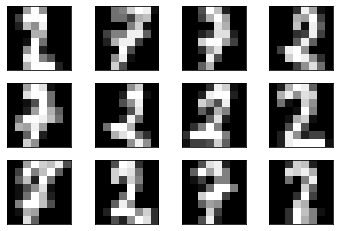

In [4]:
import matplotlib.pyplot as plt

pixels = [col for col in df.columns if col.startswith("pixel")]
sample = df.sample(12)

fig, axs = plt.subplots(3, 4)
for ax, index in zip(axs.flat, sample.index):
    img = sample.loc[index, pixels].values.reshape((8, 8))
    lbl = sample.loc[index, "target"]
    ax.imshow(img, cmap="gray")
    ax.tick_params(
        left=False,
        bottom=False,
        labelleft=False,
        labelbottom=False)

# Features

In [5]:
import numpy as np

def symmetry(flat_pixels):
    img = flat_pixels.values.reshape((8, 8))
    return abs(img[:4,:] - np.flip(img[4:, :], axis=0)).mean()
    
df["symmetry"] = df[pixels].apply(symmetry, axis="columns")
df["intensity"] = df[pixels].mean(axis="columns")
df["label"] = (df["target"] == 2).astype(int)

df = df[["intensity", "symmetry", "label"]]
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 2 to 1785
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   intensity  356 non-null    float64
 1   symmetry   356 non-null    float64
 2   label      356 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.1 KB


,intensity,symmetry,label
1496,4.343750,3.93750,0
472,4.156250,4.37500,0
977,5.546875,3.34375,1
470,4.515625,3.40625,1
830,4.984375,2.96875,1
50,4.125000,3.18750,1
1016,4.921875,2.78125,1
1201,4.734375,4.59375,0
222,4.937500,5.18750,0
152,4.734375,3.03125,1


<AxesSubplot:xlabel='Intensity', ylabel='Symmetry'>

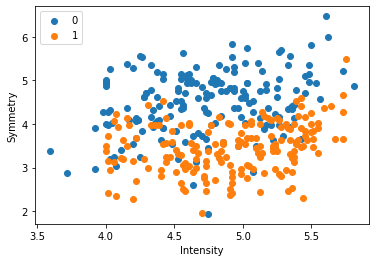

In [6]:
def plot_data(ax, df):
    for name, data in df.groupby("label"):
        ax.scatter("intensity", "symmetry", data=data, label=name)
    ax.legend()
    ax.set(xlabel="Intensity", ylabel="Symmetry")
    return ax

fix, ax = plt.subplots()
plot_data(ax, df)

# Random Seed

In [7]:
np.random.seed(934545)

# Train-Val Split

In [8]:
df = df.sample(frac=1).reset_index(drop=True)
split = 260
train, val = df.iloc[:split, :], df.iloc[split:, :]

X_tr, Y_tr = train[["intensity", "symmetry"]], train["label"] 
X_val, Y_val = val[["intensity", "symmetry"]], val["label"]

# Plotting Utilities

In [9]:
import pandas as pd

def plot_decision_boundary(ax, m):
    x_min, x_max = df["intensity"].min() - 1, df["intensity"].max() + 1
    y_min, y_max = df["symmetry"].min() - 1, df["symmetry"].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01))
    dz = np.c_[xx.ravel(), yy.ravel()]
    _df = pd.DataFrame({
        "intensity": dz[:, 0],
        "symmetry": dz[:, 1]
    })
    
    Z = m.predict(_df).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2)
    
    return ax

def plot_results(ax1, ax2, m, train, val):
    plot_decision_boundary(ax1, m)
    plot_decision_boundary(ax2, m)
    plot_data(ax1, train)
    plot_data(ax2, val)
    return ax1, ax2

# Model 1: A Simple Perceptron

In [10]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("scaler", StandardScaler()),
    ("perceptron", Perceptron(eta0=0.03))
])
model.fit(X_tr, Y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('perceptron', Perceptron(eta0=0.03))])

Model 1
Train: 0.7038461538461539
Val: 0.78125


(<AxesSubplot:xlabel='Intensity', ylabel='Symmetry'>,
 <AxesSubplot:xlabel='Intensity', ylabel='Symmetry'>)

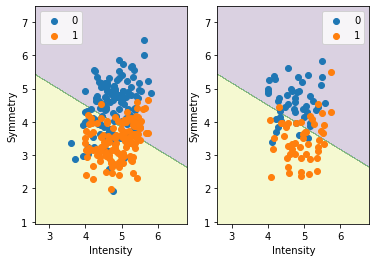

In [11]:
print("Model 1")
print("Train:", model.score(X_tr, Y_tr))
print("Val:", model.score(X_val, Y_val))
fig, (ax1, ax2) = plt.subplots(ncols=2)
plot_results(ax1, ax2, model, train, val)

In [12]:
model[1].coef_, model[1].intercept_

(array([[-0.03181273, -0.08389367]]), array([0.]))

# Feature Tranfsorms: The Polynomial Case

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False)
X_tr[:5], poly.fit_transform(X_tr, Y_tr).round(2)[:5]

(   intensity  symmetry
 0   5.265625   5.03125
 1   5.296875   3.71875
 2   5.234375   4.21875
 3   5.281250   2.81250
 4   4.656250   3.00000,
 array([[ 5.27,  5.03, 27.73, 26.49, 25.31],
        [ 5.3 ,  3.72, 28.06, 19.7 , 13.83],
        [ 5.23,  4.22, 27.4 , 22.08, 17.8 ],
        [ 5.28,  2.81, 27.89, 14.85,  7.91],
        [ 4.66,  3.  , 21.68, 13.97,  9.  ]]))

# Model 2: Adding Model Complexity

In [15]:
model2 = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(2, include_bias=False)),
    ("perceptron", Perceptron(eta0=0.03))
])
model2.fit(X_tr, Y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('perceptron', Perceptron(eta0=0.03))])

Model 2
Train: 0.7576923076923077
Val: 0.78125


(<AxesSubplot:xlabel='Intensity', ylabel='Symmetry'>,
 <AxesSubplot:xlabel='Intensity', ylabel='Symmetry'>)

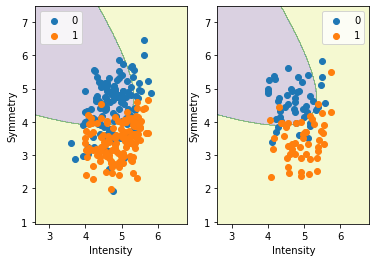

In [16]:
print("Model 2")
print("Train:", model2.score(X_tr, Y_tr))
print("Val:", model2.score(X_val, Y_val))
fig, (ax1, ax2) = plt.subplots(ncols=2)
plot_results(ax1, ax2, model2, train, val)

# Model 3: Overfitting

In [17]:
model3 = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(8, include_bias=False)),
    ("perceptron", Perceptron(eta0=0.03))
])
model3.fit(X_tr, Y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=8, include_bias=False)),
                ('perceptron', Perceptron(eta0=0.03))])

Model 3
Train: 0.7269230769230769
Val: 0.7395833333333334


(<AxesSubplot:xlabel='Intensity', ylabel='Symmetry'>,
 <AxesSubplot:xlabel='Intensity', ylabel='Symmetry'>)

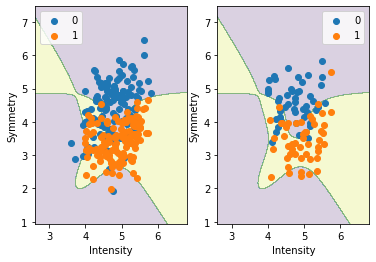

In [18]:
print("Model 3")
print("Train:", model3.score(X_tr, Y_tr))
print("Val:", model3.score(X_val, Y_val))
fig, (ax1, ax2) = plt.subplots(ncols=2)
plot_results(ax1, ax2, model3, train, val)

# Model 4: Regularization

In [19]:
model4 = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(8, include_bias=False)),
    ("perceptron", Perceptron(eta0=0.03, penalty="elasticnet", alpha=1e-2))
])
model4.fit(X_tr, Y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=8, include_bias=False)),
                ('perceptron',
                 Perceptron(alpha=0.01, eta0=0.03, penalty='elasticnet'))])

Model 4
Train: 0.7923076923076923
Val: 0.8125


(<AxesSubplot:xlabel='Intensity', ylabel='Symmetry'>,
 <AxesSubplot:xlabel='Intensity', ylabel='Symmetry'>)

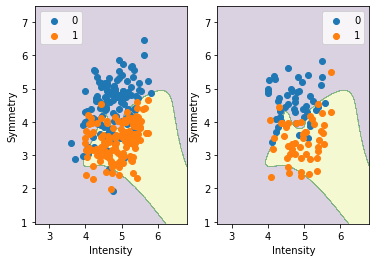

In [20]:
print("Model 4")
print("Train:", model4.score(X_tr, Y_tr))
print("Val:", model4.score(X_val, Y_val))
fig, (ax1, ax2) = plt.subplots(ncols=2)
plot_results(ax1, ax2, model4, train, val)